In [2]:
#!wget http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
!tree

.
├── chapter01.ipynb
├── chapter02.ipynb
├── chapter03.ipynb
├── chapter04.ipynb
├── hightemp.txt
├── jawiki-country.json
├── neko.pickle
├── neko.txt
├── neko.txt.json
├── neko.txt.mecab
└── out
    ├── col1+2.txt
    ├── col1.txt
    ├── col2.txt
    ├── split0.txt
    ├── split1.txt
    ├── split2.txt
    ├── split3.txt
    ├── split4.txt
    ├── splitaa
    ├── splitab
    ├── splitac
    ├── splitad
    └── splitae

1 directory, 23 files


In [3]:
import MeCab
import json
import pickle
#text = "ほのかちゃんは僕に有能って言ってくれるから好き！！"

with open("neko.txt","r") as rf:
    text = rf.read()
text = text.replace("\n","")
t = MeCab.Tagger('-Ochasen')
t.parse('')
node = t.parseToNode(text)
dict_list = []
while node:
    surface = node.surface
    feature = node.feature.split(",")
    if feature[0] != 'BOS/EOS':
        dict_list.append({
            'surface': surface,
            'pos': feature[0],
            'pos1': feature[1],
            'pos2': feature[2],
            'pos3': feature[3],
            'form1': feature[4],
            'form2': feature[5],
            'baseform': feature[6],
                })
    node = node.next 

#with open("neko.txt.json","a") as af:
#    json.dump(dict_list,af)
with open('neko.pickle', 'wb') as f:
    pickle.dump(dict_list, f)

## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [4]:
# 多分できてる

## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [5]:
with open("neko.pickle", "rb") as f:
    dict_list = pickle.load(f,encoding="utf-8")

for word in dict_list[:100]:
    if word['pos'] == "動詞":
        print(word['surface'])

生れ
つか
し
泣い
し
いる
始め
見
聞く
捕え
煮
食う


## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [6]:
for word in dict_list[:100]:
    if word['pos'] == "動詞":
        print(word['baseform'])

生れる
つく
する
泣く
する
いる
始める
見る
聞く
捕える
煮る
食う


## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [7]:
for word in dict_list[:100]:
    if word['pos1'] == "サ変接続":
        print(word['baseform'])

見当
記憶
話


## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ． 

In [8]:
for i,word in enumerate(dict_list[:1000]):
    if word['surface'] == "の":
        pan = dict_list[i-1]
        bou = dict_list[i+1]
        if pan['pos'] == "名詞" and bou['pos'] == "名詞":
            print(pan['surface'],bou['surface'])

彼 掌
掌 上
書生 顔
はず 顔
顔 真中
穴 中
書生 掌
掌 裏
何 事
肝心 母親
藁 上
笹原 中
池 前
池 上
一樹 蔭
垣根 穴
隣家 三
時 通路
一刻 猶予
家 内
彼 書生
以外 人間
前 書生
おさん 隙
おさん 三


## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [9]:
for i,word in enumerate(dict_list[:1000]):
    if word['pos'] == "名詞":
        words = []
        while dict_list[i]['pos'] == "名詞":
            words.append(dict_list[i]['surface'])
            i += 1
        if len(words) > 1:
            print(words)

['人間', '中']
['一番', '獰悪']
['時', '妙']
['一', '毛']
['その後', '猫']
['一', '度']
['ぷうぷうと', '煙']
['邸', '内']
['三', '毛']
['書生', '以外']
['四', '五', '遍']
['五', '遍']
['この間', 'おさん']
['三', '馬']


## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [10]:
import collections
c = collections.Counter([d['surface'] for d in dict_list])
print(c.most_common(10))

[('の', 9194), ('。', 7484), ('て', 6873), ('、', 6772), ('は', 6422), ('に', 6268), ('を', 6071), ('と', 5515), ('が', 5339), ('た', 3989)]


## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<function matplotlib.pyplot.show(*args, **kw)>

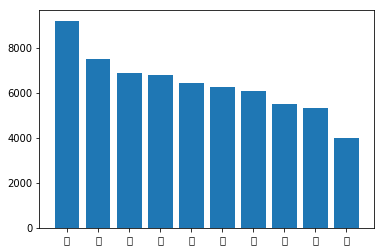

In [12]:
c10 = c.most_common(10)

x = [word for (word, _) in c10]
y = [freq for (_, freq) in c10]

import matplotlib.pyplot as plt
plt.bar(x,y)
plt.show

## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

<function matplotlib.pyplot.show(*args, **kw)>

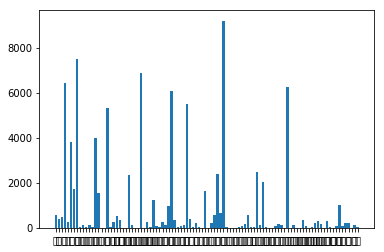

In [13]:
x = [word for word, _ in c.items()]
y = [freq for _, freq in c.items()]
plt.bar(x[:100],y[:100])
plt.show

## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

<function matplotlib.pyplot.show(*args, **kw)>

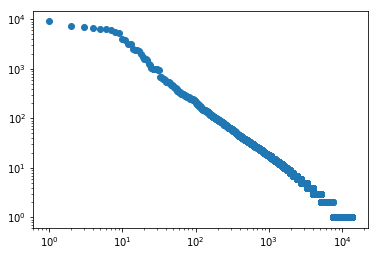

In [17]:
y = [freq for (_, freq) in c.most_common()]
x = range(1,len(y)+1)
plt.xscale("log")
plt.yscale("log")
plt.scatter(x,y)
plt.show